In [ ]:
pip install yfinance 

In [10]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.4 MB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 29.7 MB 33.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 53.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import pandas as pd
import datetime

/Users/antoine/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
APL = "AAPL"

In [ ]:
data = yf.Ticker(APL) # Extraction avec yfinance
prix_rec = data.history(period = '1d', start = '2020-1-1', end = '2023-10-26')
prix_anc = data.history(period = '1d', start = '1980-12-12', end = '2023-10-26')

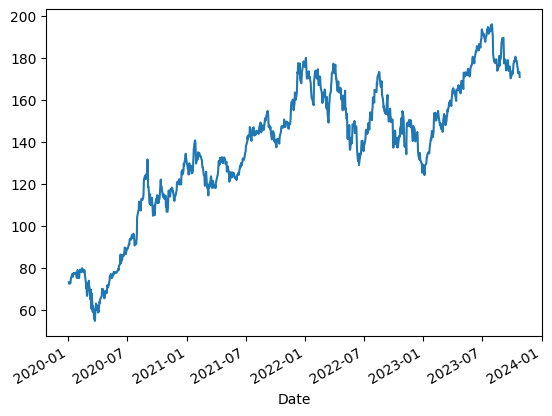

In [10]:
prix_rec['Close'].plot() # Depuis 2020
plt.show()

prix_anc['Close'].plot() # Depuis 1980
plt.show()

In [ ]:
df=pd.read_csv("AAPL.csv")  # Passage en pandas 

df['Date']=pd.to_datetime(df['Date']) # On convertit en amont toutes les dates en dates
df=df[['Date', 'Close']] # On ne garde que la variable de close qui est celle qui nous intéresse

df= df[df['Date'] >= pd.to_datetime('2020-01-01')] # On va commencer notre étude à partir de dates récentes

df['NumeroLigne'] = df.reset_index().index # Pour indexer le temps dans le futur

In [2]:
def moving_average_forecast(series, window_size):  # Modèle pour modéliser la valeur future : moyenne des x dernière valeurs
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

In [ ]:
prix_forecast = moving_average_forecast(df['Close'], 30)[split_time - 30:] 

In [14]:
def plot_series(time, series, format="-", start=0, end=None, label=None): # fonction pour plot toujours comme on veut
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

    
time = np.arange(962)  # Intervalle de temps : tous les jours depuis le 2020-01-01
split_time = 500       # Temps à partir duquel on concentre notre étude
time_valid = time[split_time:]
x_valid = df['Close'][split_time:]

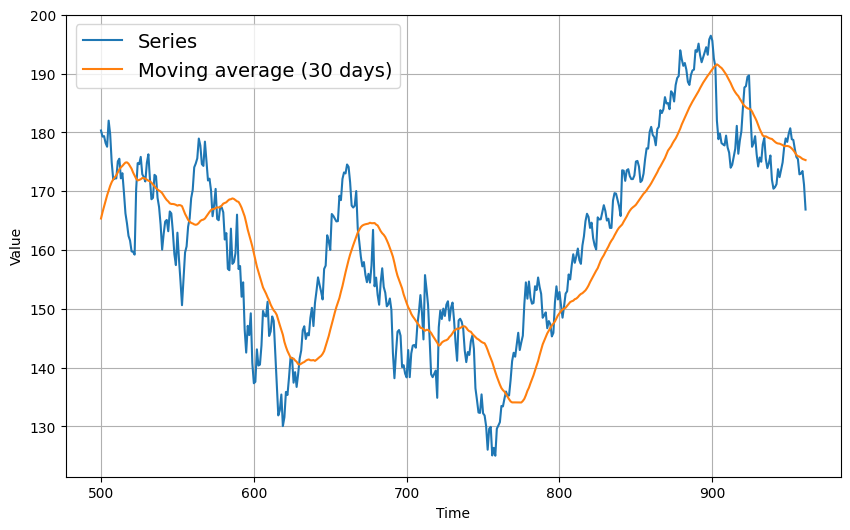

In [33]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label = "Series")
plot_series(time_valid, prix_forecast, label = "Moving average (30 days)")

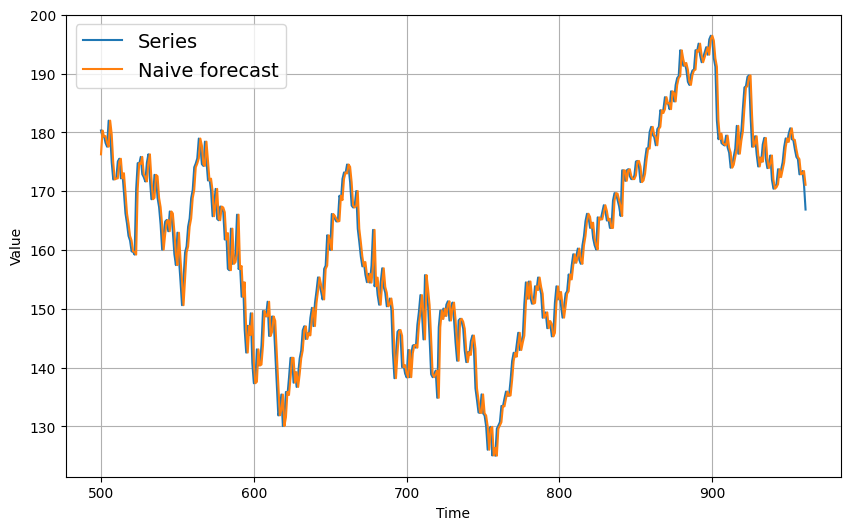

In [41]:
naive_forecast = df['Close'][split_time - 1:-1] # Avec le naive forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Naive forecast")

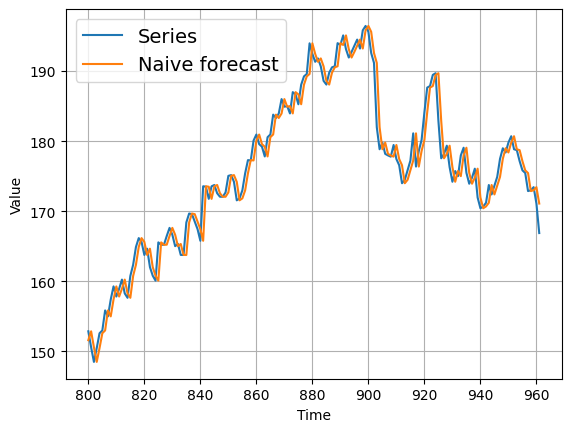

In [38]:
# On zoom sur l'efficacité du naive forecast 

split_time2 = 800
time_naive = time[split_time2:]
x_naive = df['Close'][split_time2:]
naive_forecast2 = df['Close'][split_time2 - 1:-1]
plot_series(time_naive, x_naive, label="Series")
plot_series(time_naive, naive_forecast2, label="Naive forecast")

In [42]:
# Erreur des modèles 
import tensorflow as tf 

# Naive forecast 
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

# Moving average 
print(tf.keras.metrics.mean_absolute_error(x_valid, prix_forecast).numpy())


2.2220128095238088
7.309727871789324
